In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50V2, EfficientNetV2S
#import tensorflow_hub as hub
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [14]:

batch_size = 32
image_size = (32,32)
validation_split = 0.2

# Create the training dataset from the 'train' directory
train_ds = image_dataset_from_directory(
    directory='./train/train',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Create the validation dataset from the 'train' directory
validation_ds = image_dataset_from_directory(
    directory='./train/train',
    batch_size=batch_size,
    image_size=image_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

test_ds = image_dataset_from_directory(
    directory='./test',
    batch_size=batch_size,
    image_size=image_size
)

Found 2026 files belonging to 5 classes.
Using 1621 files for training.
Found 2026 files belonging to 5 classes.
Using 405 files for validation.
Found 473 files belonging to 1 classes.


In [15]:

def preprocess_data(image, label):
    return tf.keras.applications.resnet_v2.preprocess_input(image), label
def preprocess_data_efficientnet(image, label):
    return tf.keras.applications.efficientnet.preprocess_input(image), label


train_ds_resnet = train_ds.map(preprocess_data)
train_ds_efficient = train_ds.map(preprocess_data_efficientnet)


val_ds_resnet = validation_ds.map(preprocess_data)
val_ds_efficient = validation_ds.map(preprocess_data_efficientnet)

test_ds_resnet = test_ds.map(preprocess_data)
test_ds_efficient = test_ds.map(preprocess_data_efficientnet)


In [16]:
# Load ResNet50V2 / EfficientNetV2S and freeze the layers for feature extraction
base_model_resnet = ResNet50V2(input_shape=(32, 32, 3),
                             include_top=False,
                             weights='imagenet',
                             )

base_model_resnet.trainable = False

base_model_eff = EfficientNetV2S(input_shape=(32, 32, 3),
                             include_top=False,
                             weights='imagenet',
                             )

base_model_eff.trainable = False

In [17]:
# Create the model
model_resnet = Sequential([
    base_model_resnet,
    GlobalAveragePooling2D(), # we can assume that our base model is now powerfull enough the use GAP instead of Flatten
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes in CIFAR-10
])

# Create the model
model_eff = Sequential([
    base_model_eff,
    GlobalAveragePooling2D(), # we can assume that our base model is now powerfull enough the use GAP instead of Flatten
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes in CIFAR-10
])

# Compile the model
model_resnet.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
model_eff.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
import matplotlib.pyplot as plt

def plotLosses(history):
  # Create a figure and a grid of subplots with a single call
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
  # Plot the loss curves on the first subplot
  ax1.plot(history.history['loss'], label='training loss')
  ax1.plot(history.history['val_loss'], label='validation loss')
  ax1.set_title('Loss curves')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss')
  ax1.legend()
  # Plot the accuracy curves on the second subplot
  ax2.plot(history.history['accuracy'], label='training accuracy')
  ax2.plot(history.history['val_accuracy'], label='validation accuracy')
  ax2.set_title('Accuracy curves')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  # Adjust the spacing between subplots
  fig.tight_layout()
  # Show the figure
  plt.show()

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 16s 271ms/step - accuracy: 0.3348 - loss: 1.9443 - val_accuracy: 0.5580 - val_loss: 1.3504
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 235ms/step - accuracy: 0.5903 - loss: 1.2026 - val_accuracy: 0.6272 - val_loss: 1.1188
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 243ms/step - accuracy: 0.6790 - loss: 0.9665 - val_accuracy: 0.6716 - val_loss: 0.9921
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - accuracy: 0.7359 - loss: 0.8235 - val_accuracy: 0.6889 - val_loss: 0.9361
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - accuracy: 0.7750 - loss: 0.7304 - val_accuracy: 0.6914 - val_loss: 0.8812


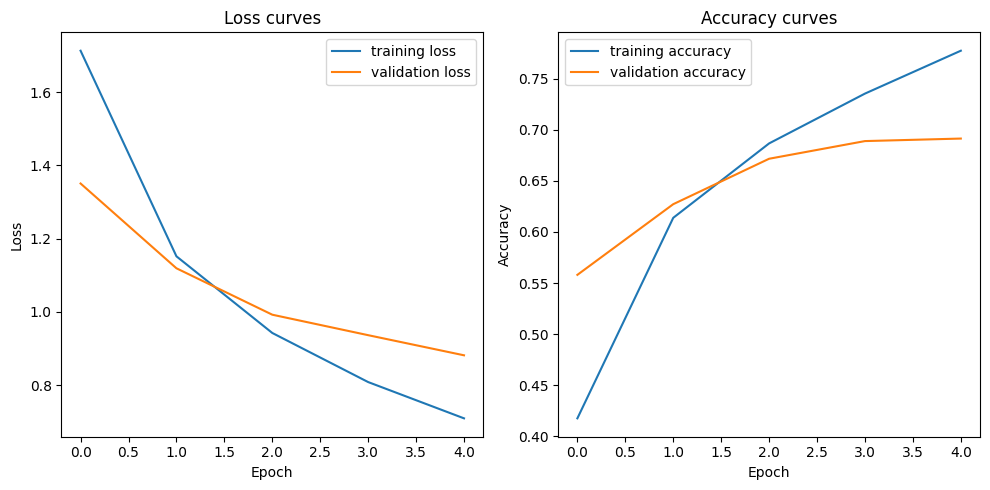

In [19]:
history_resnet = model_resnet.fit(train_ds_resnet,
                validation_data = val_ds_resnet,
                batch_size = 32,
                epochs = 5
                )

plotLosses(history_resnet)


Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 106s 783ms/step - accuracy: 0.2049 - loss: 1.7639 - val_accuracy: 0.4099 - val_loss: 1.4764
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 467ms/step - accuracy: 0.3673 - loss: 1.4603 - val_accuracy: 0.3951 - val_loss: 1.4410
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 435ms/step - accuracy: 0.4157 - loss: 1.3998 - val_accuracy: 0.4247 - val_loss: 1.3719
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 433ms/step - accuracy: 0.4480 - loss: 1.3229 - val_accuracy: 0.4889 - val_loss: 1.3360
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 437ms/step - accuracy: 0.4949 - loss: 1.2746 - val_accuracy: 0.4691 - val_loss: 1.2820


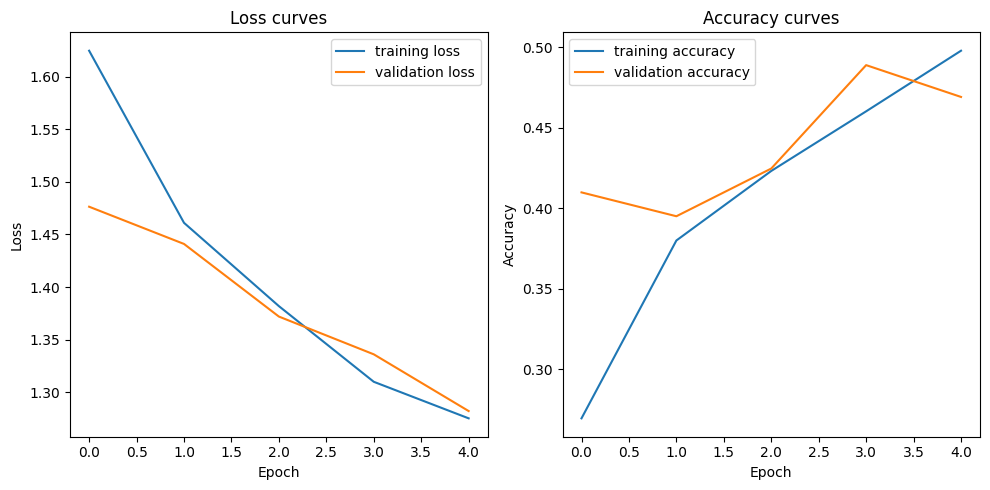

In [20]:
history_eff = model_eff.fit(train_ds_efficient,
                validation_data = val_ds_efficient,
                batch_size = 32,
                epochs = 5
                )

plotLosses(history_eff)

In [21]:
model_eff.summary()
# Assuming 'base_model' is your pre-loaded EfficientNet model
number_of_layers = len(base_model_eff.layers)
print(f"\nThe base model has {number_of_layers} layers.")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-s (Functional)   │ (None, 1, 1, 1280)     │    20,331,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,827,136 (79.45 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 20,331,360 (77.56 MB)

 Optimizer params: 330,518 (1.26 MB)


The base model has 513 layers.


In [22]:
# Fine-tuning
# Unfreeze some of the last layers of the base model
base_model_eff.trainable = True
fine_tune_at = 100  # example layer number to start fine-tuning from (we don't want to fine-tune the very early layers: those will most likely be good enough)

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model_eff.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile the model (necessary for the changes to take effect)
model_eff.compile(optimizer=Adam(1e-5),  # Lower learning rate for fine-tuning / before it was 1e-3
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [23]:
# Continue training, but only for 2 epochs: just for demonstration purposes

history_finetuned = model_eff.fit(train_ds_efficient,
                validation_data = val_ds_efficient,
                batch_size = 32,
                epochs = 5
                )

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 236s 771ms/step - accuracy: 0.1655 - loss: 3.4348 - val_accuracy: 0.1901 - val_loss: 2.7657
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 33s 643ms/step - accuracy: 0.1679 - loss: 2.9699 - val_accuracy: 0.1852 - val_loss: 2.6963
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 34s 662ms/step - accuracy: 0.1963 - loss: 2.6997 - val_accuracy: 0.1877 - val_loss: 2.5118
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 739ms/step - accuracy: 0.2196 - loss: 2.4848 - val_accuracy: 0.2444 - val_loss: 2.3046
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 737ms/step - accuracy: 0.2603 - loss: 2.2758 - val_accuracy: 0.2691 - val_loss: 2.1026


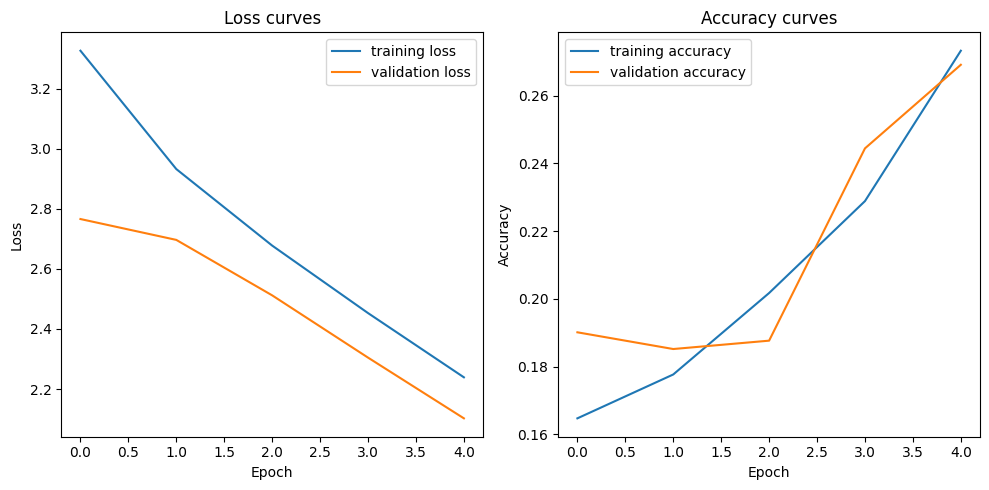

In [24]:
plotLosses(history_finetuned)

In [25]:
import numpy as np

predictions = model_eff.predict(test_ds_efficient)
predicted_classes = np.argmax(predictions, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step


In [26]:
import pandas as pd

# Suppose you need to extract IDs from filenames (common in competitions)
file_paths = test_ds.file_paths  # This attribute might not exist directly; might need modification
ids = [fp.split('\\')[-1].split('.')[0] for fp in file_paths]

submission_df = pd.DataFrame({
    'id': ids,
    'label': predicted_classes
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_eff.csv', index=False)